In [1]:
import tensorflow as tf

# if tf.__version__ < "2.0.0":
#   !pip install --upgrade tensorflow_gpu==2.0

In [2]:
print(tf.__version__)

2.0.0


# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [Errno 11001] getaddrinfo failed

# STEP 2 : DATA PREPROCESSING

We have to scale x_train and x_test so that all values are in the [0, 1] interval. **Why do we need to scale ?** goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.





In [0]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# STEP 4 : COMPILATION

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL

In [8]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2962 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1465 - accuracy: 0.9574
Epoch 3/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1104 - accuracy: 0.9669
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0890 - accuracy: 0.9730
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0768 - accuracy: 0.9753


# STEP 6 : EVALUATE THE TRAINING 

### Now let’s check that the model performs well on the test set, too:

In [15]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/1 - 1s - loss: 0.0386 - accuracy: 0.9771


In [16]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07467894115392118
0.9771


# STEP 7 (optional) : PREDICTION

array([3])

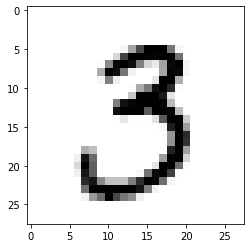

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')
model.predict_classes(x_test[90].reshape(1, 28, 28 ))


In [23]:
model.predict_classes(x_test[7].reshape(1,28,28))

array([9])

In [21]:
y_test[7]

9